<h1>Transformada de Laplace </h1>

A transformada de Laplace é bastante utilizada na análise de sinais e sistemas lineares. É uma ferramenta útil para análise da saída de um sistema descrito por equações diferenciais, além de permitir a análise de estabilidade de sistemas. Por exemplo, a transformada de Laplace é fundamental no projeto e análise de sistemas de controle, permitindo que engenheiros determinem a resposta de um sistema a diferentes entradas e projetem controladores para garantir o desempenho desejado. Engenheiros eletrônicos usam a transformada de Laplace para estudar circuitos elétricos e analisar sua resposta em regime transitório e em regime permanente.

Nesse documento apresentaremos como o Python pode ser utilizado no cômputo da transformada de Laplace.

<h2>1. Definição Matemática </h2>

A Transformada de Laplace é definida como:

$$
X(s) = \int_{0^-}^\infty x(t)e^{-st}dt
$$

No Python será necessário utilizar computação simbólica para determinar o cálculo da transformada de Laplace. Dessa forma, utilizaremos a biblioteca `sympy`.

<b> Exemplo 1: </b> Vamos determinar a transformada de Laplace de $x(t) = e^{-at}u(t)$ com $a > 0$.

Matematicamente, a transformada de Laplace desse sinal é calculada como:

$$
X(s) = \int_{0}^\infty e^{-at}e^{-st}dt = \int_{0}^\infty e^{-(s+a)t}dt = \frac{1}{s+a} \quad \mathrm{Re}\{s\} > -a
$$

Sendo $\mathrm{Re}\{s\} > -a$ a região de convergência da transformada, que a partir daqui será omitida por comodidade. 

Vamos utilizar a computação simbólica para calcular essa transformada de Laplace. Para isso vamos declarar as variáveis simbólicas `t`, `s` e `a` usando a função `symbols` da biblitoca `sympy`. A variável `t` refere-se ao tempo e a variável `s` é a frequência complexa ($s = \sigma + j\omega$). A variável `a` deve ser real e positiva, para isso usamos os argumentos `real=True` e `positive=True`. Após isso, criamos o sinal $x(t)$ propriamente dito.

In [1]:
import sympy as sympy
sympy.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline

t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

x = sympy.exp(-a*t)
x

Após isso, podemos calcular a transformada de Laplace usando a função `laplace_transform`. Utilizaremos o argumento `noconds=True` para apresentar apenas a expressão da transformada de Laplace.

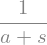

In [6]:
X = sympy.laplace_transform(x, t, s, noconds=True)
X

A transformada de Laplace inversa pode ser determinada com a função `inverse_laplace_transform`. Para simplificar, a partir de agora iremos criar duas funções, `Laplace()`, que determine a transformada de Laplace e `invLaplace()`, que determina a Laplace inversa.

In [8]:
def Laplace(x):
    return sympy.laplace_transform(x, t, s, noconds=True, simplify=True)

def invLaplace(X):
    return sympy.inverse_laplace_transform(X, s, t)

A Laplace inversa calculada nesse Exemplo 1 deve ser, obviamente, $e^{-at}u(t)$, como indicado no código:

In [10]:
xinv = invLaplace(X)
xinv

O resultado aparece multiplicado por $\theta(t)$, que é a função de Heaviside, matematicamente definida como:

$$
\theta (t) = \begin{cases}
1, & t > 0 \\
1/2, & t = 0 \\
0, & t < 0
\end{cases}
$$

A função de Heaviside é igual ao degrau unitário, a não ser em $t = 0$, que no caso, $u(0) = 1$ e $\theta(0) = 1/2$. A transformada inversa é apresentada no gráfico abaixo, considerando $a = 1$. Para isso, utilizaremos a função `plot` da bilbioteca `sympy`. Para substituir os valores de `a` e `t`, utilizaremos a função `subs`.

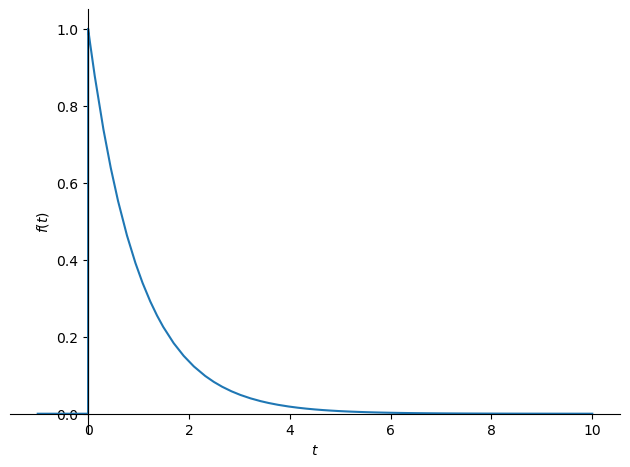

In [14]:
sympy.plot(xinv.subs({a: 1}), (t, -1, 10))

<b> Exemplo 2: </b> Determine a transformada de Laplace de $x(t) = u(t)$.

Como a transformada de Laplace é unilateral e opera para $t \geq 0$, então para $t \geq 0$, $u(t) = 1$.

In [15]:
import sympy as sympy
sympy.init_printing()
t, s = sympy.symbols('t, s')

def Laplace(x):
    return sympy.laplace_transform(x, t, s, noconds=True, simplify=True)

def invLaplace(X):
    return sympy.inverse_laplace_transform(X, s, t)

x = 1
X = Laplace(x)
X

<b> Exemplo 3: </b> Determine a transformada de Laplace de $x(t) = \cos(\omega t)u(t)$. 

Nesse caso, deveremos declarar uma nova variável simbolica, denominada de `omega`, que é real.

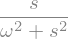

In [16]:
import sympy as sympy
sympy.init_printing()
t, s = sympy.symbols('t, s')

def Laplace(x):
    return sympy.laplace_transform(x, t, s, noconds=True)

def invLaplace(X):
    return sympy.inverse_laplace_transform(X, s, t)

#----

omega = sympy.symbols('omega', real=True)
x = sympy.cos(omega*t)
X = Laplace(x)
X

<b> Exemplo 4: </b> Determine a transformada de Laplace de $x(t) = \delta (t)$. O impulso pode ser criado usando a função `DiracDelta` da biblioteca `sympy`.

In [17]:
import sympy as sympy
sympy.init_printing()
t, s = sympy.symbols('t, s')

def Laplace(x):
    return sympy.laplace_transform(x, t, s, noconds=True)

def invLaplace(X):
    return sympy.inverse_laplace_transform(X, s, t)

x = sympy.DiracDelta(t)
X = Laplace(x)
X

<h2> 2. Transformada de Laplace Inversa </h2>

A trasformada de Laplace inversa é calculada como:

$$
x(t) = \frac{1}{2\pi j} \int_{c-j\infty}^{c+j\infty} X(s)e^{st}ds
$$

sendo $c$ um valor escolhido na região de convergência da transformada. Todavia, o cálculo direto dessa integral é dificil de ser feito e requer o conhecimento de variáveis complexas. Como dito nas notas de aula, o principal método para calcular a transformada de Laplace inversa é utilizar a expansão em frações parciais e depois calcular a inversa por insperção. Utilizando a função `apart`, é possível realizar a expansão em frações parciais.

<b> Exemplo 5: </b> Determine a expansão em frações parciais e a transformada de Laplace inversa de:
$$
X(s) = \frac{1}{(s+1)(s+2)}
$$

A partir de agora, não apresentarei mais as chamadas de bibliotecas e nem a definição das funções `Laplace()` e `invLaplace()`. Suponha que elas já estão carregadas.

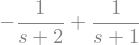

In [18]:
X = 1/((s+1)*(s+2))
sympy.apart(X,s)

Não é necessário determinar a expansão em frações parciais para determinar a inversa, mas sim utilizar a função `invLaplace` que já criamos anteriormente.

In [19]:
x = invLaplace(X)
x

É interessante ver que o resultado é o mesmo se aplicarmos a inversa por insperção em relação à transformada de Laplace expandida em frações parciais:

In [20]:
invLaplace(sympy.apart(X,s))

<h2> 3. Propriedades da Transformada de Laplace </h2>

Vamos verificar algumas propriedades da Transformada de Laplace utilizando alguns exemplos e testando se a propriedade é verdadeira. Não procurarei demonstrar todas as propriedades, visto que isso seria um trabalho tedioso. Fica a cargo para você verificar e testar essas propriedades.

<h3> Propriedade 1 - Linearidade </h3> 

Sendo $X_1(s) = \mathcal{L}\{x_1(t)\}$ e $X_2(s) = \mathcal{L}\{x_2(t)\}$, então $\mathcal{L}\{ax_1(t) + bx_2(t)\} = aX_1(s) + bX_2(s)$.

<b> Exemplo 6: </b> Seja $x_1(t) = e^{-t}u(t)$ e $x_2(t) = e^{-2t}u(t)$, determine a transformada de Laplace de $x_1(t)$, a transformada de Laplace de $x_2(t)$ e a transformada de Laplace de $0,5x_1(t) + 1,5x_2(t)$. Verifique se a propriedade da Linearidade é valida.

Primeiro vamos determinar a transformada de Laplace de $x_1(t)$:

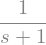

In [21]:
x1 = sympy.exp(-t)
X1 = Laplace(x1)
X1

Após isso, vamos determinar a transformada de Laplace de $x_2(t)$:

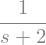

In [22]:
x2 = sympy.exp(-2*t)
X2 = Laplace(x2)
X2

Agora a transformada de Laplace de $x_1(t) + x_2(t)$:

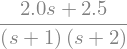

In [26]:
x = 0.5*x1 + 1.5*x2
X = Laplace(x)
X

Verifique que a transformada de Laplace de $x_1(t) + x_2(t)$ é igual à $X_1(s) + X_2(s)$, como apresentado no código abaixo:

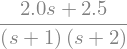

In [27]:
sympy.simplify(0.5*X1 + 1.5*X2)

Utilizamos a função `simplify` para realizar a simplificação algébrica da expressão matemática.

<h3> Propriedade 2 - Deslocamento </h3> 

Sendo $X(s) = \mathcal{L}\{x(t)\}$, então $\mathcal{L}\{x(t-\tau)u(t-\tau)\} = X(s)e^{-s\tau}$.

<b> Exemplo 7: </b> Determine a transformada de Laplace de $x(t) = e^{-at}u(t)$ e depois disso, determine a transformada de Laplace de: 

$$
x_s(t) = x(t-\tau)u(t - \tau) = e^{-a(t - \tau)}u(t - \tau)
$$

Verifique se a propriedade do deslocamento é válida.

Primeiro vamos determinar a transformada de Laplace de $x(t) = e^{-at}u(t)$:

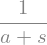

In [28]:
a = sympy.symbols('a', real=True, positive=True)
x = sympy.exp(-a*t)
X = Laplace(x)
X

Agora vamos determinar a transformada de Laplace de $x_s(t) = x(t-\tau)u(t - \tau)$. Para isso vamos criar uma nova variável simbólica $\tau$, que deve ser real e positiva. Nesse caso, como o sinal deve iniciar em $t = \tau$, deveremos multiplicar-ló por $u(t - \tau)$:

In [29]:
tau = sympy.symbols('tau', real=True, positive=True)

xs = sympy.exp(-a*(t-tau))*sympy.Heaviside(t-tau)
xs

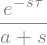

In [30]:
Xs = Laplace(xs)
Xs

Ver, de fato, que $\mathcal{L}\{x_s(t)\} = \mathcal{L}\{x(t-\tau)u(t-\tau)\} = X(s)e^{-s\tau}$, logo a propriedade é válida, pois:

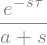

In [31]:
sympy.exp(-s*tau)*X

<h3> Propriedade 3 - Convolução </h3>

Sendo $X_1(s) = \mathcal{L}\{x_1(t)\}$ e $X_2(s) = \mathcal{L}\{x_2(t)\}$, então $\mathcal{L}\{x_1(t) \ast x_2(t)\} = X_1(s)X_2(s)$.

<b> Exemplo 8: </b> Utilizando a transformada de Laplace, determine a convolução entre os dois sinais:
$$
x_1(t) = e^{-t}u(t)
$$
$$
x_2(t) = e^{-2t}u(t)
$$

Inicialmente vamos determinar a convolução a partir da definição da integral:

$$
x_1(t) \ast x_2(t) = \int_{-\infty}^\infty x_1(\tau)x_2(t-\tau) d\tau
$$

Como $x_1(\tau)$ e $x_2(\tau)$ são sinais causais, então:

$$
x_1(\tau) = 0 \quad \tau < 0
$$
$$
x_2(t - \tau) = 0 \quad \tau > t
$$

logo:

$$
x_1(t) \ast x_2(t) = \int_{0}^t x_1(\tau)x_2(t-\tau) d\tau
$$

Para calcular a convolução, vamos utilizar a função `integrate` da biblioteca `sympy`.

In [32]:
tau = sympy.symbols('tau', real=True, positive=True)

x1 = sympy.exp(-t)
x2 = sympy.exp(-2*t)
xconv = sympy.integrate(x1.subs(t, tau)*x2.subs(t, t - tau), (tau, 0, t))
sympy.simplify(xconv)

Utilizamos a função `simplify` apenas para simplificar a expressão algébrica. Essa convolução poderia ter sido determinada através dos seguintes passos:

1. Determinar a transformada de Laplace de $x_1(t)$ e $x_2(t)$.
2. Multiplicar as duas transformadas de Laplace.
3. Determinar a transformada de Laplace inversa.

In [33]:
X1 = Laplace(x1)
X2 = Laplace(x2)
Xconv = X1*X2

invLaplace(Xconv)

Ambos os resultados são iguais, como era de se esperar.

<h3> Propriedade 4 - Teorema do Valor Inicial e do Valor Final </h3>

Sendo $X(s) = \mathcal{L}\{x(t)\}$, então:

$$
x(0^+) = \lim_{s \to \infty} sX(s)
$$
$$
 x(\infty) = \lim_{s \to 0} sX(s)
$$

<b> Exemplo 9: </b> Determine os valores iniciais e valores finais do sinal com a seguinte transformada de Laplace:

$$
X(s) = \frac{7s + 10}{s(s+2)}
$$

Vamos fazer da forma dificil. Primeiro vamos determinar a transformada inversa:

In [34]:
X = (7*s + 10)/(s*(s+2))
x = invLaplace(X)
x

O valor inicial é calculado para $t = 0^+$:

In [35]:
x.subs(t,0)*2

Como dito, a função de Heaviside $\theta(t)$ é igual a 1/2 quando $t = 0$, ao passo que o degrau unitário $u(t)$ é igual a 1 quando $t = 0$. Por isso que multiplicamos o resultado por dois. Poderiamos ter determinado esse valor utilizando o teorema do valor inicial. Para aplicar o limite, vamos utilizar a função `limit` da biblioteca `sympy`:

In [36]:
sympy.limit(s*X,s,sympy.oo)

O valor final é calculado para $\lim_{t \to \infty} x(t)$:

In [37]:
sympy.limit(x,t,sympy.oo)

Poderiamos ter determinado esse valor utilizando o teorema do valor final:

In [38]:
(s*X).subs(s,0)

<h2> 4. Solução de Equações Integro-Diferenciais </h2>

A transformada de Laplace pode ser utilizada para solução de equações diferenciais. Nesse caso devemos aplicar a transformada de Laplace unilateral em ambos lados da equação diferencial, isolar a transformada de Laplace da saída e calcular a sua transformada inversa, de forma obter $y(t)$.

<b> Exemplo 10: </b> Resolva a seguinte equação diferencial:

$$
\frac{d^2}{dt^2}y(t) + 5\frac{d}{dt}y(t) + 6y(t) = \frac{d}{dt}x(t) + x(t)
$$

em que o sinal de entrada é $x(t) = e^{-4t}u(t)$ e com as seguintes condições iniciais: $y(0^-) = 2$ e $\dot{y}(0^-) = 1$.

Aplicando-se a transformada de Laplace em ambos lados da equação diferencial:

$$
s^2Y(s) - sy(0^-) - \dot{y}(0^-) + 5[sY(s) - y(0^-)] + 6Y(s) = sX(s) - x(0^-) + X(s)
$$
$$
s^2Y(s) - 2s - 1 + 5[sY(s) - 2] + 6Y(s) = sX(s) + X(s)
$$
$$
s^2Y(s) - 2s - 1 + 5sY(s) - 10 + 6Y(s) = (s+1)X(s)
$$
$$
s^2Y(s) + 5sY(s) + 6Y(s) = (s+1)X(s) + 2s + 11
$$
$$
(s^2 + 5s + 6)Y(s) = (s+1)X(s) + 2s + 11
$$

ou seja:
$$
Y(s) = \frac{s+1}{s^2 + 5s + 6} X(s) + \frac{2s + 11}{s^2 + 5s + 6}
$$

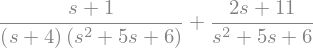

In [39]:
x = sympy.exp(-4*t)
X = Laplace(x)

Y = (s+1)/(s**2 + 5*s + 6)*X + (2*s + 11)/(s**2 + 5*s + 6)
Y

Para determinar a resposta total, basta calcular a transformada inversa:

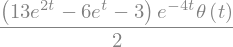

In [40]:
y = invLaplace(Y)
y

A saída de um sistema qualquer pode ser entendida como sendo a soma de duas componentes - a resposta à entrada nula e a resposta de estado nulo:

$$
y(t) = y_0(t) + y_\phi(t)
$$

sendo $y_0(t)$ a resposta à entrada nula e $y_\phi(t)$ a resposta de estado nulo. A resposta de estado nulo é determinada considerando o sistema em repouso (condições iniciais nulas) e aplicando-se a entrada, ou seja, a transformada de Laplace da resposta de estado nulo será:

$$
Y_\phi(s) = \frac{s+1}{s^2 + 5s + 6} X(s)
$$

para determinar $y_\phi(t)$ basta fazer a transformada inversa:

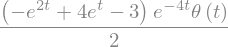

In [41]:
Y_phi = (s+1)/(s**2 + 5*s + 6)*X;
y_phi = invLaplace(Y_phi)
y_phi

Por sua vez, a resposta de entrada nula é determinada com a entrada nula e considerando as condições iniciais impostas. Ou seja, a transformada de Laplace da resposta de estado nulo é:

$$
Y_0(s) = \frac{2s + 11}{s^2 + 5s + 6}
$$

para determinar $y_0(t)$ basta fazer a transformada inversa:

In [42]:
Y_0 = (2*s + 11)/(s**2 + 5*s + 6)
y_0 = invLaplace(Y_0)
y_0

Verifique que $y(t) = y_0(t) + y_\phi(t)$:

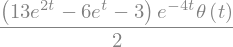

In [43]:
sympy.simplify(y_phi + y_0)


Em um sistema linear e invariante no tempo as condições inicias são nulas, ou seja, a resposta de entrada nula é igual à zero, restando apenas a resposta de estado nulo. Como a saída de um sistema LTI também é dada pela convolução da entrada com a resposta ao impulso, desta forma, a resposta de estado nulo é igual à convolução da entrada com a resposta ao impulso:

$$
y_\phi(t) = x(t) \ast h(t)
$$

<b> Exemplo 11: </b> Considere um sistema linear, invariante no tempo e causal descrito pela seguinte equação diferencial:

$$
\frac{d^2}{dt^2}y(t) + 5\frac{d}{dt}y(t) + 6y(t) = \frac{d}{dt}x(t) + x(t)
$$

Determine a saída do sistema quando à entrada é $x(t) = e^{-5t}u(t)$.

Aplicando a transformada de Laplace em ambos lados da equação diferencial e considerando as condições iniciais nulas:

$$
s^2Y(s) + 5sY(s) + 6Y(s) = sX(s) + X(s)
$$

ou seja:

$$
Y(s) = \frac{s+1}{s^2 + 5s + 6}X(s)
$$

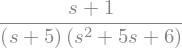

In [44]:
x = sympy.exp(-5*t)
X = Laplace(x)
Y = (s+1)/(s**2 + 5*s + 6)*X
Y

Determinando a transformada inversa:

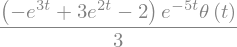

In [45]:
y = invLaplace(Y)
y

A mesma resposta poderia ser obtida através da convolução. Primeiramente, vamos determinar a resposta ao impulso do sistema. Se aplicarmos $x(t) = \delta (t)$, a saída $y(t)$ será a resposta ao impulso $h(t)$. Vemos que se $x(t) = \delta (t)$, então $X(s) = 1$, logo:

$$
H(s) = \frac{s+1}{s^2 + 5s + 6}
$$

In [46]:
H = (s+1)/(s**2 + 5*s + 6)
h = invLaplace(H)
h

<h2> 5. Função de Transferência </h2>

A função de transferência é definida como a razão entre a transformada de Laplace da saída e a transformada de Laplace da entrada considerando condições iniciais nulas:

$$
H(s) = \frac{Y(s)}{X(s)}
$$

De forma equivalente, a função de transferência é igual à transformada de Laplace da resposta ao impulso, ou seja:

$$
H(s) = \mathcal{L}\{h(t)\}
$$

de tal forma que a resposta ao impulso é a transformada de Laplace inversa da função de transferência, ou seja:

$$
h(t) = \mathcal{L}^{-1}\{H(s)\}
$$

<b> Exemplo 12: </b> Em um determinado sistema LTI causal, quando a entrada $x(t) = u(t)$ é aplicada em um sistema, a saída é $y(t) = 2e^{-3t}u(t)$. Vamos determinar a resposta ao impulso desse sistema.

Vamos primeiro determinar a função de transferência desse sistema:

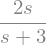

In [52]:
x = 1
X = Laplace(x)

y = 2*sympy.exp(-3*t)
Y = Laplace(y)

H = Y/X
H

Após isso, podemos determinar a transformada inversa para obter a resposta ao impulso:

In [53]:
invLaplace(H)

Embora o cálculo símbolico seja poderoso, em vários momentos estamos interessado somente no formato da saída, e não necessariamente a expressão matemática da saída para todo $t$. Para essas situações, o cálculo símbolico não é adequado (seria como cortar um pão com uma espada afiada). No caso, é melhor utilizar o cálculo numérico.

Uma das melhores bibliotecas do Python para tratar com o cálculo numérico da saída de sistemas descritos por funções de transferência é a `control`. Essa não é uma biblioteca padrão do Anaconda, sendo necessário instalar. Abra o Anaconda Terminal e digite:

```Python
conda install -c conda-forge control slycot
```

Siga os passos e aguarde a instalação do pacote.

Para criar uma função de transferência utilizamos a função `tf()`, que recebe como argumento dois vetores: o primeiro corresponde ao vetor de coeficientes do polinômio numerador da função transferência, o segundo argumento é o vetor de coeficientes do polinômio denominador da função transferência.

<b> Exemplo 13: </b> Vamos considerar um sistema descrito pela seguinte função transferência:

$$
H(s) = \frac{2}{3s + 1}
$$

primeiramente vamos criar esse sistema:

In [1]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

num = np.array([2])
den = np.array([3 , 1])
H = control.tf(num , den)
H

TransferFunction(array([2]), array([3, 1]))

Para determinar a resposta ao impulso, utiliza-se a função `impulse_response`. Essa função recebe dois argumentos: a função transferência e o vetor de tempo de simulação. O vetor de simulação deve ser, necessariamente, criado usando-se o `linspace`. Vamos supor que desejamos calcular a resposta ao impulso do sistema anterior de $0 \leq t \leq 15$ com passo de simulação de $10^{-4}$:

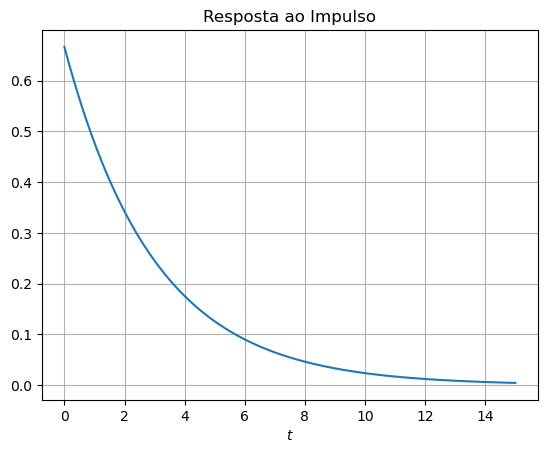

In [2]:
t0 = 0
tend = 15
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

t, h = control.impulse_response(H, T)

plt.plot(t, h)
plt.title("Resposta ao Impulso")
plt.xlabel("$t$")
plt.grid()
plt.show()

A resposta ao degrau pode ser determinada de forma semelhante utilizando-se a função `step_response`:

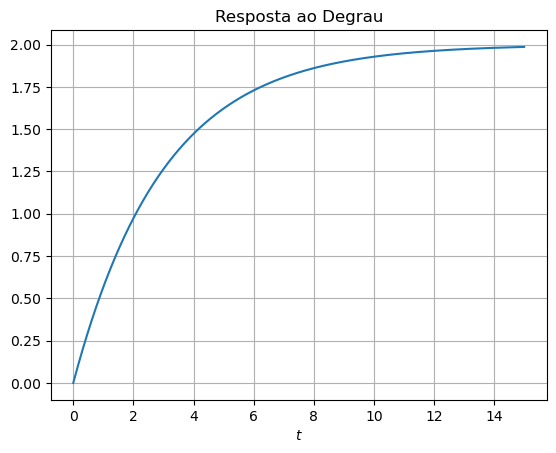

In [3]:
t0 = 0
tend = 15
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

t, sr = control.step_response(H, T)

plt.plot(t, sr)
plt.title("Resposta ao Degrau")
plt.xlabel("$t$")
plt.grid()
plt.show()

Na realidade, a saída do sistema à qualquer entrada pode ser calculada usando a função `forced_response`. Vamos supor que desejamos calcular a saída do sistema quando a entrada é $x(t) = e^{-2t}u(t)$:

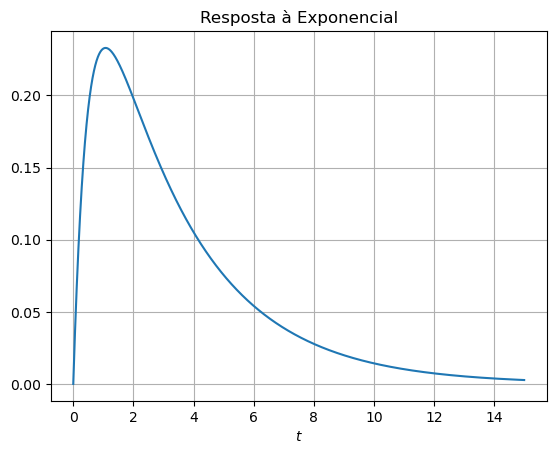

In [4]:
t0 = 0
tend = 15
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

x = np.exp(-2 * T)
t, y = control.forced_response(H, T, x)

plt.plot(t, y)
plt.title("Resposta à Exponencial")
plt.xlabel("$t$")
plt.grid()
plt.show()

O diagrama de polos e zeros pode ser obtido através da função `pzmap`. Relembrando que sistemas LTIC serão estáveis se todos os polos estiverem no SPE.

(array([-0.33333333+0.j]), array([], dtype=complex128))

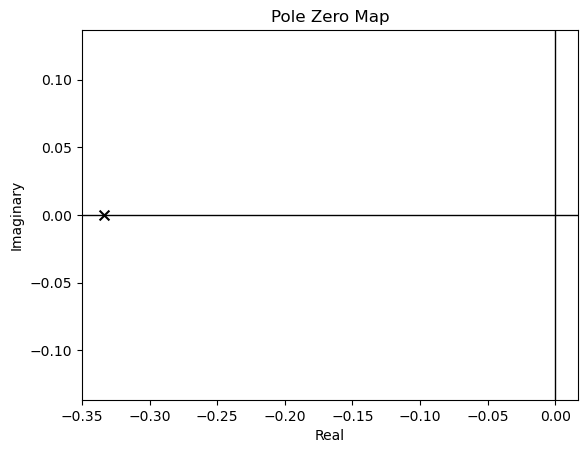

In [5]:
control.pzmap(H)

<h2> 6. Interconexão de Sistemas LTI </h2>

A associação de sistemas LTI é uma técnica amplamente utilizada na engenharia de controle para combinar vários sistemas lineares em um único sistema equivalente. Essa abordagem permite analisar e projetar sistemas mais complexos, dividindo-os em blocos menores e conectando-os adequadamente. Utilizando a biblioteca `control` do Python, a associação de sistemas LTI pode ser facilmente realizada.


<b> Exemplo 14: </b> Considere duas funções de transferência dadas:

$$
H_1(s) = \frac{2}{s}
$$

$$
H_2(s) = \frac{1}{s + 2}
$$

A associação em série dessas duas funções de transferências será calculada através da função `series`:

In [6]:
H1 = control.tf([2] , [1,0])
H2 = control.tf([1] , [1,2])
Hseries = control.series(H1,H2)
Hseries

TransferFunction(array([2]), array([1, 2, 0]))

Veja que é igual ao resultado esperado pela teoria, em que:

$$
H_{eq,series} = H_1(s)H_2(s)
$$

Por sua vez, a associação em paralelo dessas duas funções de transferências será calculada através da função `parallel`:

In [7]:
Hparallel = control.parallel(H1,H2)
Hparallel

TransferFunction(array([3, 4]), array([1, 2, 0]))

Também é igual ao resultado esperado pela teoria:

$$
H_{eq,parallel} = H_1(s) + H_2(s)
$$

A associação em feedback é calculada através da função `feedback`. O primeiro argumento é a função de transferência da malha direta, ao passo que o segundo argumento é a função de transferência da malha de realimentação, como indicado na Figura abaixo:

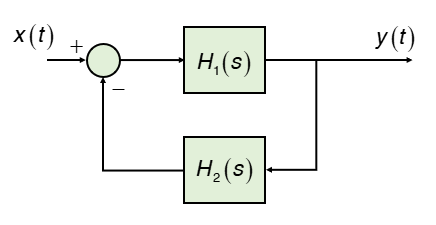

In [8]:
Hfeedback = control.feedback(H1, H2, sign=-1)
Hfeedback

TransferFunction(array([2, 4]), array([1, 2, 2]))

Em que o argumento `sign=-1` indica que é uma realimentação negativa. Novamente, verifique que o resultado é igual ao obtido de forma teórica:

$$
H_{eq,feedback} = \frac{H_1(s)}{1 + H_1(s)H_2(s)}
$$

<h2> Aplicação - Análise de um Motor de Corrente Contínua </h2>

Segundo o Castrucci: "os motores de corrente contínua são muito utilizados nas indústrias, pois são empregados para realizar diversos tipos de acionamentos mecânicos". A Figura abaixo (Castrucci) representa um esquema de um motor de corrente contínua controlado por armadura.

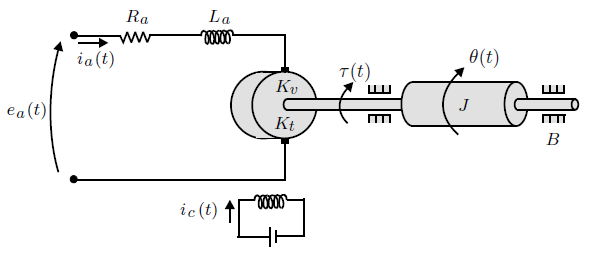

Em que:
- $e_a(t)$: tensão de armadura;
- $i_a(t)$: corrente de armadura;
- $R_a$: resistência de armadura;
- $L_a$: indutância de armadura;
- $i_c(t)$: corrente de campo do motor;
- $\tau(t)$: conjungado eletromagnético (torque) do motor;
- $\theta(t)$: posição angular do eixo;
- $B$: coeficiente do atrito angular;
- $J$: inércia do conjunto formado pelo rotor do motor e pela carga mecânica;
- $K_t$: consante de proporcionalidade entre o conjugado eletromagnético do motor e a corrente de armadura;
- $K_v$: constante de proporcionalidade entre a força contraeletromotriz gerada pela armadura em toração e a velocidade angular do eixo.

A dinâmica do sistema é representado pelas seguintes equações diferenciais:

$$
e_a(t) = R_ai_a(t) + L_a\frac{di_a(t)}{dt} + K_v\frac{d\theta(t)}{dt}
$$

$$
\tau(t) = K_ti_a(t)
$$

$$
\tau(t) = J\frac{d^2\theta(t)}{dt^2} + B\frac{d\theta(t)}{dt}
$$

Aplicando a transformada de Laplace nas equações diferenciais e considerando as condições inicais nulas:

$$
E_a(s) = R_aI_a(s) + sL_aI_a(s) + sK_v\Theta(s)
$$

$$
T(s) = K_tI_a(s)
$$

$$
T(s) = s^2J\Theta(s) + sB\Theta(s)
$$

Desta forma:

$$
s^2J\Theta(s) + sB\Theta(s) = K_tI_a(s)
$$

ou seja:

$$
I_a(s) = \frac{s^2J\Theta(s) + sB\Theta(s)}{K_t}
$$

Aplicando-se na equação referente a tensão de armadura:

$$
E_a(s) = I_a(s)\left( R_a + sL_a \right) + sK_v\Theta(s)
$$

$$
E_a(s) = \left(\frac{s^2J\Theta(s) + sB\Theta(s)}{K_t} \right) \left( R_a + sL_a \right) + sK_v\Theta(s)
$$

Após algum algebrismo:

$$
\frac{\Theta(s)}{E_a(s)} = \frac{K_t}{s[JL_as^2 + (R_aJ + L_aB)s + R_aB + K_vK_t]}
$$

Se a variável de saída é a velocidade angular:

$$
\omega(t) = \frac{d\theta (t)}{dt}
$$

$$
\Omega(s) = s\Theta(s)
$$

ou seja:

$$
\frac{\Omega(s)}{E_a(s)} = G(s) = \frac{K_t}{JL_as^2 + (R_aJ + L_aB)s + R_aB + K_vK_t}
$$

Na maioria dos casos, a indutância $L_a$ é muito pequena, logo:

$$
L_aB \ll R_aJ
$$

$$
JL_a \approx 0
$$

o que resulta em:

$$
\frac{\Omega(s)}{E_a(s)} = G(s) = \frac{K_t}{sR_aJ + R_aB + K_vK_t}
$$

ou seja:

$$
G(s) = \frac{\frac{K_t}{R_aB + K_vK_t}}{\left( \frac{R_aJ}{R_aB + K_vK_t} \right)s + 1}
$$


Desta forma, o motor DC pode ser aproximado por uma função transferência de primeira ordem:

$$
\frac{\Omega(s)}{E_a(s)} = G(s) = \frac{K_m}{a s + 1}
$$

sendo:

$$
K_m = \frac{K_t}{R_aB + K_vK_t}
$$

$$
a = \frac{R_aJ}{R_aB + K_vK_t}
$$

Vamos supor um determinado motor da ElectroCraft de corrente máxima de 2A e tensão máxima de 30V e que possui os seguintes parâmetros estimados:

- $R_a = 3 \Omega$
- $L_a = 6 \mathrm{mH}$
- $K_t = K_v = 50 \times 10^{-3} \; \mathrm{N\cdot m/A}$ 
- $J = 10^{-4}  \;  \mathrm{N\cdot m\cdot s^2/rad}$
- $B = 1,05 \times 10^{-4}  \;  \mathrm{N\cdot m\cdot s/rad}$

Calculando os parâmetros da função transferência de primeira ordem:

In [9]:
Ra = 3
La = 6e-3
Kv = 50e-3
Kt = 50e-3
J = 1e-4
B = 1.05e-4

Km = Kt/(Ra*B + Kv*Kt)
a = Ra*J/(Ra*B + Kv*Kt)

print('Km = ', Km)
print('a = ', a)

Km =  17.76198934280639
a =  0.10657193605683835


Criando a função de transferência do motor DC:

In [10]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

num = np.array([Km])
den = np.array([a , 1])
G = control.tf(num , den)
G

TransferFunction(array([17.76198934]), array([0.10657194, 1.        ]))

Vamos simular aplicando um degrau de tensão de 10 V na entrada do motor:

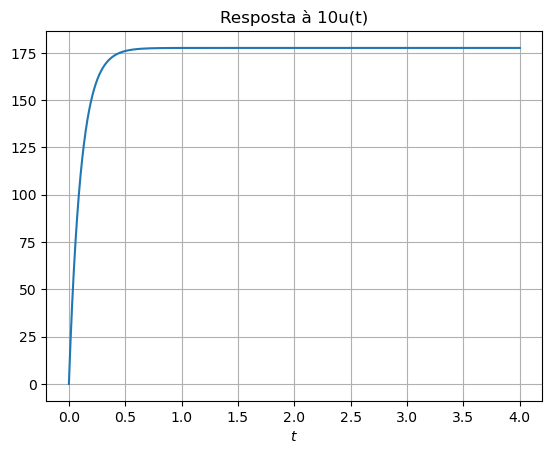

In [11]:
t0 = 0
tend = 4
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

x = 10
t, y = control.forced_response(G, T, x)

plt.plot(t, y)
plt.title("Resposta à 10u(t)")
plt.xlabel("$t$")
plt.grid()
plt.show()

Pelo gráfico, notamos que a velocidade do motor em regime será um pouco maior do que 175 rad/s. O mesmo valor poderia ter sido aplicando-se o teorema do valor final. Sendo:

$$
e_a(t) = 10u(t)
$$

$$
E_a(s) = \frac{10}{s}
$$

A transformada de Laplace da velocidade angular pode ser calculada como:

$$
\Omega(s) = E_a(s)G(s) = \frac{177,6}{s(0,1066s + 1)}
$$

Pelo teorema do valor final:

$$
\lim_{t\to\infty} \omega(t) = \lim_{s\to0} s\Omega(s) = \lim_{s\to0} \frac{177,6}{0,1066s + 1}
$$

logo:

$$
\lim_{t\to\infty} \omega(t) = 177,6
$$

Em controle temos a definição de [Fonte: https://materialpublic.imd.ufrn.br/curso/disciplina/1/63/2/8]:
- O regime transiente é analisado a partir do instante em que se aplica uma entrada até o instante em que o sistema não varia mais (ou varia pouco).
- O regime permanente é analisado a partir do instante que sua saída não varia mais (ou varia pouco).

Para o motor analisado, o transiente demora aproximadamente 0,5s. 

Na prática, nós queremos que o motor "gire" a uma certa velocidade angular. Todavia, no motor modelado, a entrada é um valor de tensão. Qual deve ser o valor de tensão aplicado para que o motor gire em uma certa velocidade? Poderiamos pensar em contratar um operador que, medindo a velocidade do motor, pudesse aplicar mais ou menos tensão nos terminais do motor. Se a velocidade do motor estiver baixa, ele aumenta a tensão aplicada. Se a velocidade do motor estiver alta, ele diminui a tensão aplicada. Esse operador seria um "controlador" para o motor, e está ilustrado na Figura abaixo:

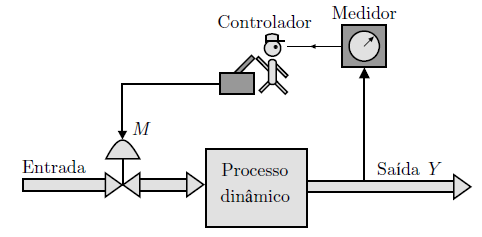

Podemos construir um sistema que se comporte como esse controlador. O esquema mais simples de controle é apresentado na Figura abaixo:

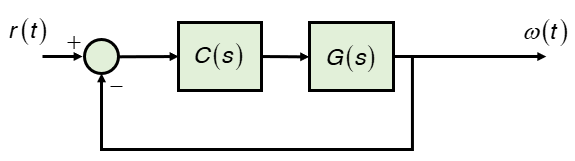

O sinal $r(t)$ é chamado de referência. O controlador é representado pelo sistema $C(s)$, e recebe como informação o sinal de erro entre a saída do motor $G(s)$, representado pelo sinal $\omega(t)$, e a referência:

$$
e(t) = r(t) - \omega (t)
$$

se $e(t) = 0$, a saída da planta é igual à referência e portanto nada é feito. Se $e(t) > 0$, que dizer que a velocidade de rotação do motor é menor do que a referência, e portanto o controlador deve aplicar mais tensão nos terminais do motor. Se $e(t) < 0$, que dizer que a velocidade de rotação do motor é maior do que a referência, e portanto o controlador deve aplicar menos tensão nos terminais do motor. O sinal gerado pelo controlador e aplicado ao motor é chamado de sinal de controle.

A função transferência em malha fechada será:

$$
H(s) = \frac{C(s)G(s)}{1 + G(s)C(s)}
$$

Vamos utilizar um controlador proporcional, tal que $C(s) = 2$. Vamos determinar a função transferência em malha fechada:

In [12]:
K = 2
C = control.tf(K , 1)
CG = control.series(C,G)
H = control.feedback(CG,1,sign=-1)
H

TransferFunction(array([35.52397869]), array([ 0.10657194, 36.52397869]))

A referência agora é o valor de velocidade angular que desejamos que o motor gire. Por exemplo, se quisermos que o motor gire a uma velocidade de 50 rad/s, basta aplicar uma referência de $r(t) = 50u(t)$:

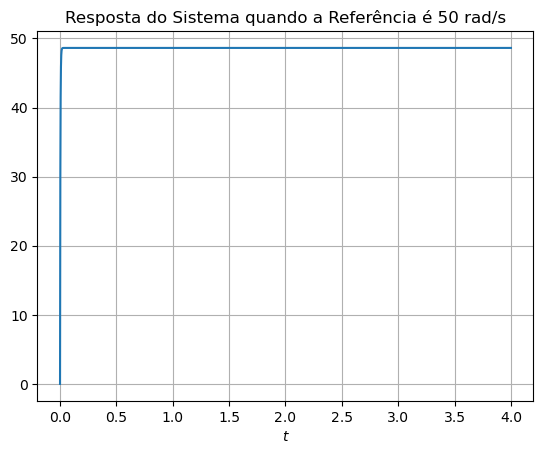

In [13]:
t0 = 0
tend = 4
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

r = 50
t, y = control.forced_response(H, T, r)

plt.plot(t, y)
plt.title("Resposta do Sistema quando a Referência é 50 rad/s")
plt.xlabel("$t$")
plt.grid()
plt.show()

Verifique que existe um erro. Isso pode ser resolvido utilizando outros tipos de controladores. Existem outros detalhes que ainda não foram explorados:

- Por exemplo, o sinal de tensão aplicado no motor não deve exceder o valor de tensão nominal. Em momento nenhum analisamos isso.
- Além disso, o sinal de controle não é aplicado diretamente ao motor, mas sim em um circuito que aciona o motor de forma adequada através de um sinal PWM, por exemplo. 
- Qual deve ser o valor de $K$ adequado? Apenas chutamos um valor, mas existem métodos de projeto adequados para isso.
- Como medir a velocidade de rotação do motor?
- Se desejamos implementar o controlador em um microcontrolador, como converter a função de transferência do controlador em um algoritmo computacional que realize a mesma coisa?

Esses detalhes serão estudados em disciplinas posteriores, como Controle, Instrumentação, Automação Industrial, Processamento Digital de Sinais e Eletrônica Analógica.